K-평균 군집화(K-means clustering) : 비슷한 속성끼리 분류하기

목표: 데이터들을 비슷한 속성끼리 분류

via 최효원's Jupyter Notebook

첫 번째 데이터는 변수들에 의미가 없는, 단순 학습 목적으로 만들어진 인위적 데이터,
두 번째 데이터는 LightGBM 모델링 작업 시 사용한 고객 데이터 중, 일부 변수와 정보를 담은 데이터셋입니다.

데이터를 적절한 수의 그룹으로 나누고, 그룹의 특징을 살펴볼 수 있는 K-means cluster 알고리즘을
해당 작업에 사용했습니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data 1(단순 학습 데이터)

df = pd.read_csv('https://raw.githubusercontent.com/snkn1959/data_source/main/example_cluster.csv')
#데이터 출처 : https://raw.githubusercontent.com/snkn1959/data_source

In [2]:
df

#total : 1000 rows / 2 cols

,var_1,var_2
0,3.264413,6.929164
1,0.220814,2.251631
2,-8.786197,-8.333582
3,-0.008547,2.630791
4,4.912903,6.888520
5,-0.269598,0.900277
6,4.368269,6.362004
7,-12.060188,-7.610425
8,3.145771,6.911496
9,5.072230,5.190216


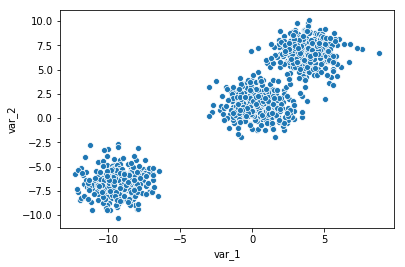

In [3]:
sns.scatterplot(x='var_1', y='var_2', data = df)
#데이터를 산점도를 활용한 시각화

*한 눈에 보기에도 데이터가 크게 3가지 그룹으로 나뉘어 있습니다.

*사람의 눈으로 인지되는대로, K-means clustering 을 이용해 3개 그룹으로 나누는 작업을 진행했습니다.

In [4]:
from sklearn.cluster import KMeans
#import
kmeans_model = KMeans(n_clusters=3, random_state=100)

#n_clusters = 3 으로 지정
kmeans_model.fit(df)
#학습

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [5]:
kmeans_model.predict(df)
#예측

array([1, 2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0,
       0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2,
       0, 1, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1,
       2, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1,
       0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1,
       2, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 2, 0,
       2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0,
       1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2,
       2, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 2,
       2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2,

In [6]:
df['label']=kmeans_model.predict(df)
#예측값을 label 컬럼으로 지정

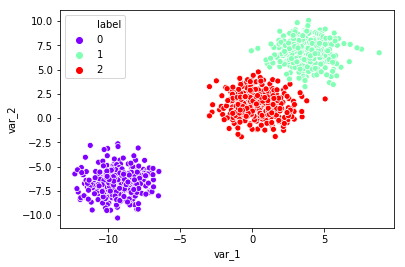

In [7]:
sns.scatterplot(x='var_1', y='var_2', data = df, hue='label', palette='rainbow')

#hue(범례) 를 label 로 지정 후, 산점도 시각화

In [8]:
kmeans_model.inertia_

3090.033237076661

*inertia : 각 그룹에서의 중심과 각 그룹에 해당하는 데이터 간 거리에 대한 합

*해당 값이 작을수록 그룹별로 더 오밀조밀 잘 모이게 분류됐다고 할 수 있습니다.

*작을수록 좋다고 할 수 있으나, n_clusters(K) 값이 커지면 거리의 합(inertia) 는 필연적으로 작아지게 됩니다,
따라서 적절한 K 값 지정이 필요하다고 할 수 있습니다.

In [10]:
#solution : elbow method

distance = []
#빈 리스트 생성
for k in range(2,10):#n_clusters 값 순회
    k_model = KMeans(n_clusters=k)  #객체 생성
    k_model.fit(df)   #학습  
    distance.append(k_model.inertia_)   #inertia 를 리스트에 저장

    

  

In [11]:
distance

[9908.551424778394,
 3090.033237076661,
 2717.156382973784,
 2381.882295660949,
 2050.6542509944356,
 1810.5594208319858,
 1594.2736497062783,
 1370.715130179979]

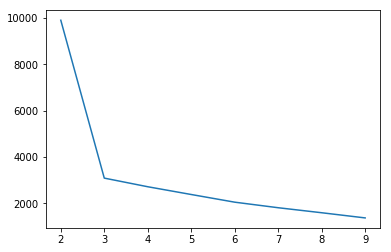

In [12]:
sns.lineplot(x=range(2,10),y=distance)
#elbow method 시각화(선형그래프)

*K 값이 커짐에 따라 distance y 는 점점 작아지는 모양입니다.

*유독 급격히 각도가 변화하는 지점을 확인할 수 있습니다(K = 3).

*이와 같이, elbow method 를 활용하여 distance 가 급격히 줄어드는 K 값을 포착해 최적의 군집 수를 찾을 수 있습니다.

In [13]:
#Data 2(고객 구매내역 데이터)

customer = pd.read_csv('https://raw.githubusercontent.com/snkn1959/data_source/main/customer.csv')
#데이터 출처 : https://raw.githubusercontent.com/snkn1959/data_source

#카드번호(id) #구매내역 범주 #거래 금액

In [14]:
customer.head()
#total : 240454 rows / 3 cols

,cc_num,category,amt
0,2703186189652095,misc,4.97
1,630423337322,grocery,107.23
2,38859492057661,entertainment,220.11
3,3534093764340240,gas_transport,45.00
4,375534208663984,misc,41.96


In [16]:
customer['cc_num'].nunique()
#카드번호 고윳값 확인

100

In [17]:
customer['category'].nunique()
#구매내역 범주 고윳값 확인

11

*각 고객이 어떤 범주에 얼만큼 지불했는지 계산 후, K-means clustering 을 활용해 비슷한 특성을 가진 고객끼리 묶는 작업을 진행했습니다.

* 데이터 전처리

In [19]:
customer_dummy = pd.get_dummies(customer, columns=['category'])
#더미 변수로 변환

customer_dummy.head()

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0,0,0,0,0,0,0,1,0,0,0
1,630423337322,107.23,0,0,0,1,0,0,0,0,0,0,0
2,38859492057661,220.11,1,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,45.00,0,0,1,0,0,0,0,0,0,0,0
4,375534208663984,41.96,0,0,0,0,0,0,0,1,0,0,0


*범주별로 얼만큼의 금액을 썼는지 계산을 위해, 더미 변수로 변환된 영역에 amt(거래 금액) 변수값을 곱해 계산했습니다.

In [22]:
cat_list = customer_dummy.columns[2:]
#구매내역 범주 더미 컬럼 분리

for i in cat_list:
    customer_dummy[i] = customer_dummy[i]*customer_dummy['amt']
    #순회
customer_dummy
    #더미 컬럼(0 또는 1) 에 거래 금액 곱셈 작업

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,24.7009,0.0000,0.0000,0.0000
1,630423337322,107.23,0.0000,0.0000,0.0000,11498.2729,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,38859492057661,220.11,48448.4121,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,3534093764340240,45.00,0.0000,0.0000,2025.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,375534208663984,41.96,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1760.6416,0.0000,0.0000,0.0000
5,4767265376804500,94.63,0.0000,0.0000,8954.8369,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,30074693890476,44.54,0.0000,0.0000,0.0000,1983.8116,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,6011360759745864,71.65,0.0000,0.0000,5133.7225,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,4922710831011201,4.27,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,18.2329,0.0000,0.0000,0.0000
9,2720830304681674,198.39,0.0000,0.0000,0.0000,39358.5921,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [23]:
len(customer_dummy)

240454

In [24]:
customer_agg = customer_dummy.groupby('cc_num').sum()
#cc_num(카드번호) 별 총 금액

In [25]:
customer_agg.head()
#상위 5행 확인

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,48149.62,6.056682e+05,385802.1192,3.580829e+05,8.029639e+05,1.885161e+05,6.605954e+05,5.756238e+05,2.491587e+06,3.986549e+05,4.807151e+06,9.170703e+02
571365235126,259784.87,1.477727e+06,986328.2015,2.326082e+06,4.777060e+06,1.551506e+06,1.885162e+06,1.736166e+06,1.132923e+07,2.121268e+06,5.237960e+07,1.372105e+07
571465035400,270081.63,1.220661e+06,941430.5437,6.352238e+05,4.138075e+06,1.145584e+06,2.267962e+06,6.925623e+05,1.724544e+06,6.603466e+05,1.165795e+07,2.312415e+07
630412733309,41959.52,3.378474e+05,130209.7686,3.593008e+05,1.142082e+06,2.703643e+05,2.248908e+05,3.706556e+05,1.083458e+06,2.072742e+05,4.597840e+06,2.996106e+04
630423337322,244612.73,1.415818e+06,566924.1753,2.329402e+06,4.297872e+06,1.239596e+06,2.086044e+06,1.512455e+06,1.754212e+07,1.670054e+06,9.076779e+07,8.198909e+05


*KNN, K-means clustering -> 거리 기반 알고리즘이기 때문에, 데이터 스케일의 영향을 받습니다.

*StandardScaler 를 사용해 스케일링 작업을 진행했습니다.

In [29]:
from sklearn.preprocessing import StandardScaler
#import
scaler = StandardScaler()
#스케일러 객체 생성
scaled = pd.DataFrame(scaler.fit_transform(customer_agg), columns = customer_agg.columns, index=customer_agg.index)

#스케일링 후 데이터프레임으로 변환

In [30]:
scaled.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,-1.402327,-0.761421,-0.898347,-1.025348,-0.804299,-1.428728,-0.995426,-0.952346,-0.892152,-0.820221,-0.899778,-0.419323
571365235126,1.079407,0.033744,0.398687,2.003815,0.142028,1.466858,0.851949,1.007620,0.807424,2.511814,1.310661,-0.168660
571465035400,1.200151,-0.200655,0.301716,-0.598770,-0.010130,0.604503,1.429441,-0.754856,-1.039663,-0.314033,-0.581458,0.003132
630412733309,-1.474915,-1.005627,-1.450383,-1.023473,-0.723547,-1.254847,-1.652729,-1.298504,-1.162951,-1.190407,-0.909504,-0.418793
630423337322,0.901491,-0.022706,-0.507154,2.008924,0.027922,0.804226,1.155000,0.629809,2.002232,1.639035,3.094357,-0.404361


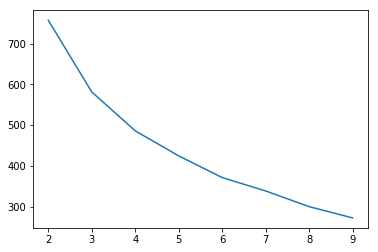

In [31]:
#elbow method 활용

distance = []
for k in range(2,10):
    k_model = KMeans(n_clusters=k)
    k_model.fit(scaled)
    labels = k_model.predict(scaled)
    distance.append(k_model.inertia_)
    

sns.lineplot(x=range(2,10), y=distance)

*어느 한 지점에서 크게 떨어지지 않고 비교적 완만하게 그래프가 내려가고 있습니다(K 값을 결정하기 어렵습니다).

*solution : 실루엣 계수(silhouette coefficient)

클러스터 내부에서의 평균 거리, 최근접한 다른 클러스터 데이터와의 평균 거리를 점수에 반영

최적 군집 수를 찾는 또다른 방법으로, elbow method 의 대안이 될 수 있습니다.

In [33]:
from sklearn.metrics import silhouette_score
#import

s = []
#실루엣 계수를 담을 리스트 생성
for k in range(2,10):    #순회
    k_model = KMeans(n_clusters=k)
    k_model.fit(scaled) #학습
    labels = k_model.predict(scaled)  #예측
    
    s.append(silhouette_score(scaled, labels))
    #실루엣 계수를 리스트에 추가

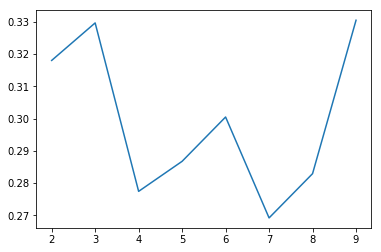

In [34]:
sns.lineplot(x = range(2,10), y = s)

*점수가 높을수록 더 좋은 분류를 의미한다고 할 수 있습니다. n_clusters = 4 일때, 모델이 가장 좋은 분류 성능을 냅니다.

In [35]:
#n_clusters = 4 적용
k_model = KMeans(n_clusters=9)
k_model.fit(scaled)
labels = k_model.predict(scaled)


In [36]:
scaled['label'] = labels
#label 을 데이터셋에서 별도의 컬럼으로 생성

In [37]:
scaled_mean = scaled.groupby('label').mean()
#label 별 평균값
scaled_count = scaled.groupby('label').count()['category_travel']
#label 별 등장 횟수

In [38]:
scaled_count = scaled_count.rename('count')

In [40]:
scaled_all = scaled_mean.join(scaled_count)
#join

scaled_all

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,count
label,,,,,,,,,,,,,
0,-0.582180,-0.313441,-0.279996,-0.200111,-0.335031,-0.487088,-0.536050,-0.268558,-0.241818,-0.478981,-0.183861,-0.296088,24
1,0.714846,-0.022001,0.201900,1.777548,-0.061171,0.830830,0.556691,1.009077,1.016098,1.401925,1.631275,-0.129681,12
2,0.050841,-0.023017,0.361062,0.558850,-0.070886,0.256904,0.319686,0.566769,0.293973,0.194776,-0.120890,0.146847,22
3,2.588796,3.402971,2.078259,-0.508027,3.577840,1.858405,1.990604,1.986641,0.755031,2.261891,1.016913,0.213985,4
4,1.392137,1.514946,0.995218,-0.769157,2.303188,0.688799,0.978474,0.830862,0.225806,1.362487,0.696536,-0.011376,5
5,-1.192212,-0.893906,-1.076521,-1.057612,-0.619354,-1.205302,-1.201689,-1.256531,-0.889377,-0.976023,-0.785009,-0.171698,20
6,-0.940815,-0.094135,-1.065073,-1.403305,-0.216125,-1.078770,-1.251791,-1.276287,-1.160301,-0.738682,-0.586443,7.977313,1
7,1.000533,-0.166624,-0.040631,-0.752905,-0.086615,0.452943,1.167708,-0.931379,-1.054469,-0.467919,-0.705702,0.042956,8
8,0.935148,1.602896,1.496287,1.408510,-0.549218,1.687973,0.560232,0.906155,2.594372,-0.367534,0.469714,-0.063600,4


*군집0, 45명 - 전체 지출액, 각 범주 금액까지 모두 다른 군집에 비해 낮은 고객군

*군집1, 37명 - gas_transport 에서 상대적으로 높은 지출을 보이지만, 딱히 특징이 없는 일반 고객군

*군집2, 10명 - 전체 지출금액, 대다수의 범주에서 높은 지출을 보이는 상위 10% VIP 고객군

*군집3, 8명 - health, home, travel 에 비교적 지출이 높고, 특히 travel 에서 압도적으로 높은 지출을 보임(여행에 관심이 많은 고객군)